In [3]:
from PosSelect_Functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

In [18]:
from scipy.stats import binomtest
binomtest(9138, 9006 + 9138)

BinomTestResult(k=9138, n=18144, alternative='two-sided', statistic=0.5036375661375662, pvalue=0.3307850973592429)

In [24]:
x = pd.read_csv("HAQERs_Results/" + file.replace("HAQER", "HAQER").replace("Progenitor", "Neuron"), sep = "\t")

x.head(20)

C:\Users\astar\AppData\Local\Temp\ipykernel_13928\407665196.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results/" + file.replace("HAQER", "HAQER").replace("Progenitor", "Neuron"), sep = "\t")


,Distance_bin,Metric,Alpha,StartCompute,Crosses,Tag,"[[dc, du], [pc, pu]]",Top_20th,LFC_bin,NumFixed,NumPoly,Iteration
0,InHAQERs,Absolute log fold-change,0.121666,0.073866,"[0.046937851149124465, 0.07386614868806474, 0....","dc > 0.1, likely stable","[[1308, 7347], [362, 2315]]",All,NoLFCCutoff,8655,2677,Real
1,InHAQERs,Absolute log fold-change,0.182068,0.079252,"[0.046937851149124465, 0.07925180819585281, 0....","dc > 0.1, likely stable","[[668, 3840], [178, 1251]]",All,LessThan0,4508,1429,Real
2,InHAQERs,Absolute log fold-change,0.049893,0.033987,"[0.03398657375883565, 0.09692855386035473, 0.1...","dc > 0.1, likely stable","[[1413, 2734], [411, 837]]",All,GreaterThan0,4147,1248,Real
3,InHAQERs,Absolute log fold-change,0.177829,0.051463,"[0.05146262532600557, 0.12839221633762563, 0.1...","dc > 0.1, likely stable","[[956, 1378], [235, 412]]",Top20th,NoLFCCutoff,2334,647,Real
4,InHAQERs,Absolute log fold-change,0.261168,0.043860,"[0.04385976674433345, 0.14387729581785808, 0.1...","dc > 0.1, likely stable","[[630, 645], [140, 194]]",Top20th,LessThan0,1275,334,Real
5,InHAQERs,Absolute log fold-change,0.367089,0.149392,"[0.1493915566761266, 0.34870576427459, 0.41164...","dc > 0.1, likely stable","[[113, 946], [22, 291]]",Top20th,GreaterThan0,1059,313,Real
6,InHAQERs,Absolute log fold-change,0.023309,0.020010,"[0.046937851149124465, 0.1654223603204617, 0.3...","dc > 0.1, likely stable","[[4574, 4081], [1399, 1278]]",All,NoLFCCutoff,8655,2677,0
7,InHAQERs,Absolute log fold-change,0.220354,0.111566,"[0.046937851149124465, 0.11156576524258116, 0....","dc < 0.1, may be unstable","[[365, 4181], [91, 1337]]",All,LessThan0,4546,1428,0
8,InHAQERs,Absolute log fold-change,-0.124045,0.037483,"[0.03748335043114229, 0.08294144717112825, 0.1...","dc > 0.1, likely stable","[[1264, 2845], [416, 833]]",All,GreaterThan0,4109,1249,0
9,InHAQERs,Absolute log fold-change,0.054613,0.043860,"[0.04385976674433345, 0.09904185175041602, 0.1...","dc > 0.1, likely stable","[[1046, 1288], [281, 366]]",Top20th,NoLFCCutoff,2334,647,0


In [2]:
x = pd.read_csv("HAQERs_Results_Permute/" + file, sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["All"]))]
#x = x[(x["Distance_bin"].isin(["InHAQERs"]))]
x = x[x["LFC_bin"] == "NoLFCCutoff"]
x["dc"] = [parse_table(i)[0] for i in x["[[dc, du], [pc, pu]]"]]
x["du"] = [parse_table(i)[1] for i in x["[[dc, du], [pc, pu]]"]]
x["Alpha all"] = x["dc"]/(x["du"] + x["dc"])*x["Alpha"]
x["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x.shape[0])
x

NameError: name 'file' is not defined

In [9]:
x_new = pd.DataFrame()
for i in np.unique(x["Distance_bin"]):
    x2 = x[x["Distance_bin"].isin([i])]
    x2_permute = x2[x2["TypeOfSampling"].isin(["Permuted"])]
    x2_bootstrap = x2[~x2["TypeOfSampling"].isin(["Permuted"])]
    correction_factor = np.median(x2_permute["Alpha"])
    print(correction_factor)
    x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
    x_new = pd.concat([x_new, x2_bootstrap])

0.0142318362106517
0.015315890899296
0.01503689815056195
0.015953524832548


C:\Users\astar\AppData\Local\Temp\ipykernel_8540\748694474.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_8540\748694474.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_8540\748694474.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [10]:
x_new

,Distance_bin,Metric,Alpha,StartCompute,Crosses,Tag,"[[dc, du], [pc, pu]]",Top_20th,LFC_bin,NumFixed,NumPoly,Iteration,TypeOfSampling,dc,du,Alpha all,CellType,Corrected alpha
80004,5kbWindow_5kbGap,Absolute log fold-change,-0.006326,0.016906,"[0.041819097230096025, 0.1850679200838356, 0.2...","dc > 0.1, likely stable","[[16375, 11983], [5249, 3817]]",All,NoLFCCutoff,28358,9066,Real,Real,16375,11983,-0.003653,Neuron,-0.020558
80006,5kbWindow_5kbGap,Absolute log fold-change,-0.071736,0.091646,"[0.04182019405664317, 0.09164584648018398, 0.1...","dc < 0.1, may be unstable","[[2665, 25693], [907, 8159]]",All,NoLFCCutoff,28358,9066,0,Bootstrap,2665,25693,-0.006742,Neuron,-0.085968
80010,5kbWindow_5kbGap,Absolute log fold-change,-0.087613,0.016908,"[0.19129730849319432, 0.2660357813381819, 0.34...","dc > 0.1, likely stable","[[16221, 12137], [5371, 3695]]",All,NoLFCCutoff,28358,9066,1,Bootstrap,16221,12137,-0.050115,Neuron,-0.101845
80014,5kbWindow_5kbGap,Absolute log fold-change,-0.030923,0.017506,"[0.04106925865277017, 0.18245138259809396, 0.2...","dc > 0.1, likely stable","[[15950, 12408], [5167, 3899]]",All,NoLFCCutoff,28358,9066,2,Bootstrap,15950,12408,-0.017393,Neuron,-0.045155
80018,5kbWindow_5kbGap,Absolute log fold-change,0.026340,0.016906,"[0.04804730691938908, 0.1850679200838356, 0.27...","dc > 0.1, likely stable","[[16447, 11911], [5199, 3867]]",All,NoLFCCutoff,28358,9066,3,Bootstrap,16447,11911,0.015277,Neuron,0.012109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39982,InHAQERs,Absolute log fold-change,0.108885,0.020010,"[0.11695142475036918, 0.15465104130488555, 0.2...","dc > 0.1, likely stable","[[4685, 3971], [1372, 1305]]",All,NoLFCCutoff,8656,2677,9995,Bootstrap,4685,3971,0.058933,Neuron,0.092931
39986,InHAQERs,Absolute log fold-change,0.050202,0.017510,"[0.08820095155766633, 0.16360454640772615, 0.3...","dc > 0.1, likely stable","[[5072, 3584], [1535, 1142]]",All,NoLFCCutoff,8656,2677,9996,Bootstrap,5072,3584,0.029416,Neuron,0.034249
39990,InHAQERs,Absolute log fold-change,0.083166,0.020010,"[0.046937851149124465, 0.16003670081267368, 0....","dc > 0.1, likely stable","[[4627, 4029], [1373, 1304]]",All,NoLFCCutoff,8656,2677,9997,Bootstrap,4627,4029,0.044456,Neuron,0.067212
39994,InHAQERs,Absolute log fold-change,0.286505,0.073877,"[0.04156279212615155, 0.07387656678026938, 0.3...","dc > 0.1, likely stable","[[1359, 7297], [314, 2363]]",All,NoLFCCutoff,8656,2677,9998,Bootstrap,1359,7297,0.044982,Neuron,0.270552


In [12]:
x = pd.read_csv("HARs_Results_Permute/" + file, sep = "\t")
np.unique(x["Metric"])

C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1670772683.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HARs_Results_Permute/" + file, sep = "\t")


array(['Absolute log fold-change'], dtype=object)

In [13]:
np.unique(x["LFC_bin"])

array(['GreaterThan0', 'LessThan0', 'NoLFCCutoff'], dtype=object)

C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HARs_Results_Permute/" + file, sep = "\t")


0.0098971228851927
0.0113767708219063
0.0407643662107274


C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy o

0.0091482610448988
0.00914057390642025
0.0413581745865605


C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy o

0.009835713580493
0.0108865324251469
0.040420266685904


C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy o

0.012564466559653
0.0142218133651443
0.0555636580826179


C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy o

0.0104890503209832
0.0111390030774759
0.045194696877552


C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy o

0.0039775311702128
0.007573116412603
0.0368216917349008


C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy o

0.0065638773012841
0.0092106385856015
0.04997850166868


C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy o

0.0078603221595321
0.0102260259524544
0.0412371134020618


C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_13220\1916383346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy o

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'AdultLoopOfHenle'),
  Text(1, 0, 'AdultProximalTubule'),
  Text(2, 0, 'FetalArterialECs'),
  Text(3, 0, 'FetalChondrocytes'),
  Text(4, 0, 'ITL23'),
  Text(5, 0, 'Microglia'),
  Text(6, 0, 'Neuron'),
  Text(7, 0, 'Progenitor')])

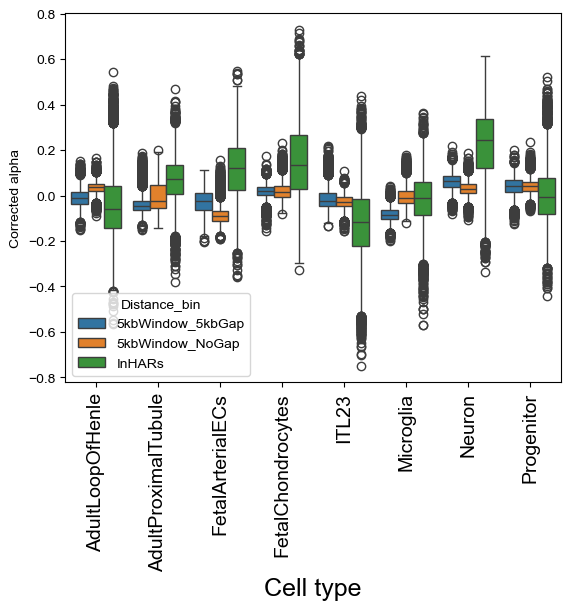

In [15]:
import os
df = pd.DataFrame()
for file in os.listdir("HARs_Results_Permute"):
    if "abs" in file and "Old" not in file:
        x = pd.read_csv("HARs_Results_Permute/" + file, sep = "\t")
        x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["All"]))]
        x = x[(~x["Distance_bin"].isin(["5kbWindow_Plus_Region"]))]
        x = x[x["LFC_bin"] == "NoLFCCutoff"]
        x_new = pd.DataFrame()
        for i in np.unique(x["Distance_bin"]):
            x2 = x[x["Distance_bin"].isin([i])]
            x2_permute = x2[x2["TypeOfSampling"].isin(["Permuted"])]
            x2_bootstrap = x2[~x2["TypeOfSampling"].isin(["Permuted"])]
            correction_factor = np.median(x2_permute["Alpha"])
            print(correction_factor)
            x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
            x_new = pd.concat([x_new, x2_bootstrap])
        x_new["dc"] = [parse_table(i)[0] for i in x_new["[[dc, du], [pc, pu]]"]]
        x_new["du"] = [parse_table(i)[1] for i in x_new["[[dc, du], [pc, pu]]"]]
        x_new["Alpha all"] = x_new["dc"]/(x_new["du"] + x_new["dc"])*x_new["Corrected alpha"]
        x_new["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x_new.shape[0])
        df = pd.concat([df, x_new])
sns.boxplot(data = df, x = "CellType", y = "Corrected alpha", hue = "Distance_bin")
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
#plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

C:\Users\astar\AppData\Local\Temp\ipykernel_8820\1533738414.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results_Permute/" + file, sep = "\t")


0.0244218487153111
0.0228548692024462
0.0208118966676967
0.0538830900990254


C:\Users\astar\AppData\Local\Temp\ipykernel_8820\1533738414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_8820\1533738414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_8820\1533738414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

0.02566774643977755
0.0221979214401866
0.0206899243971944
0.0566037735849057


C:\Users\astar\AppData\Local\Temp\ipykernel_8820\1533738414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_8820\1533738414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_8820\1533738414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

([0, 1], [Text(0, 0, 'Neuron'), Text(1, 0, 'Progenitor')])

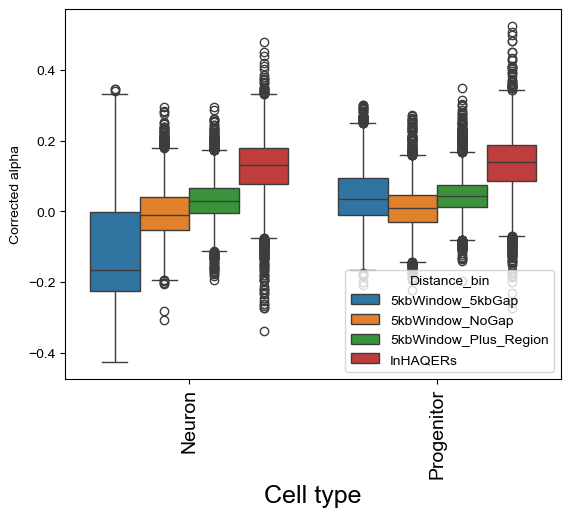

In [12]:
import os
df = pd.DataFrame()
for file in os.listdir("HAQERs_Results_Permute"):
    if "abs" in file and "Old" not in file:
        x = pd.read_csv("HAQERs_Results_Permute/" + file, sep = "\t")
        x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
        #x = x[(x["Distance_bin"].isin(["InHAQERs"]))]
        x = x[x["LFC_bin"] == "NoLFCCutoff"]
        x_new = pd.DataFrame()
        for i in np.unique(x["Distance_bin"]):
            x2 = x[x["Distance_bin"].isin([i])]
            x2_permute = x2[x2["TypeOfSampling"].isin(["Permuted"])]
            x2_bootstrap = x2[~x2["TypeOfSampling"].isin(["Permuted"])]
            correction_factor = np.median(x2_permute["Alpha"])
            print(correction_factor)
            x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
            x_new = pd.concat([x_new, x2_bootstrap])
        x_new["dc"] = [parse_table(i)[0] for i in x_new["[[dc, du], [pc, pu]]"]]
        x_new["du"] = [parse_table(i)[1] for i in x_new["[[dc, du], [pc, pu]]"]]
        x_new["Alpha all"] = x_new["dc"]/(x_new["du"] + x_new["dc"])*x_new["Corrected alpha"]
        x_new["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x_new.shape[0])
        df = pd.concat([df, x_new])
sns.boxplot(data = df, x = "CellType", y = "Corrected alpha", hue = "Distance_bin")
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
#plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

In [15]:
x = pd.read_csv("StratifySpecSup_Results_Permute/StratifiedBySpecSup_LiangSteinNeuron.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
x

,Cutoff,Metric,Alpha,StartCompute,Crosses,Tag,"[[dc, du], [pc, pu]]",Top_20th,Iteration,TypeOfSampling,NumFixed,NumPoly
2,<= 19,Absolute log fold-change,0.028672,0.075543,"[0.07554278957915839, 0.8158621274549098, 0.84...","dc > 0.1, likely stable","[[17415, 50255], [8251, 24513]]",Top20th,Real,Real,67670,32764.0
3,<= 19,Absolute log fold-change,-0.009743,0.068492,"[0.06849212921843695, 0.2024546760721443, 0.36...","dc > 0.1, likely stable","[[19042, 48628], [9284, 23480]]",Top20th,Real,Permuted,67670,32764.0
6,<= 19,Absolute log fold-change,0.035119,0.075543,"[0.07554295639196973, 1.0485340195842658, 1.08...","dc > 0.1, likely stable","[[17434, 50236], [8219, 24545]]",Top20th,0,67670,32764,NaN
7,<= 19,Absolute log fold-change,-0.005191,0.033239,"[0.06849229651376465, 0.280012092859916, 0.308...","dc > 0.1, likely stable","[[33987, 33683], [16498, 16266]]",Top20th,0,Permuted,67670,32764.0
10,<= 19,Absolute log fold-change,0.071731,0.068492,"[0.06849212921843695, 1.8170558986773546, 1.91...","dc > 0.1, likely stable","[[19329, 48341], [8869, 23895]]",Top20th,1,67670,32764,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20011,> 242,Absolute log fold-change,0.027342,0.065748,"[0.06574844802143409, 0.3888942302547056, 0.44...","dc > 0.1, likely stable","[[18314, 49356], [8689, 24075]]",Top20th,997,Permuted,67670,32764.0
20014,> 242,Absolute log fold-change,-0.008057,0.146714,"[0.060477581330409036, 0.14671364201765136, 0....","dc > 0.1, likely stable","[[7249, 60421], [3535, 29229]]",Top20th,998,67670,32764,NaN
20015,> 242,Absolute log fold-change,-0.003487,0.044798,"[0.04479829756909226, 0.10751543261435936, 0.1...","dc > 0.1, likely stable","[[25611, 42059], [12427, 20337]]",Top20th,998,Permuted,67670,32764.0
20018,> 242,Absolute log fold-change,0.022847,0.212726,"[0.2127263067903158, 0.30663209673072445, 0.35...","dc < 0.1, may be unstable","[[4274, 63396], [2025, 30739]]",Top20th,999,67670,32764,NaN


In [25]:
x_new

,Cutoff,Metric,Alpha,StartCompute,Crosses,Tag,"[[dc, du], [pc, pu]]",Top_20th,Iteration,TypeOfSampling,NumFixed,NumPoly,Corrected alpha,dc,du,Alpha all,CellType
8008,104-187,Absolute log fold-change,0.002052,0.051171,"[0.05117054264529053, 0.42460663046092173, 0.4...","dc > 0.1, likely stable","[[396660, 1825691], [121698, 561286]]",All,Real,Real,2222351,682984.0,0.000548,396660,1825691,0.000098,Neuron
8012,104-187,Absolute log fold-change,0.010535,0.051171,"[0.05117054264529053, 0.24932030352705403, 0.2...","dc > 0.1, likely stable","[[99467, 456336], [53292, 247097]]",All,0,555803,300389,NaN,0.009032,99467,456336,0.001616,Neuron
8016,104-187,Absolute log fold-change,-0.005548,0.012358,"[0.033983532264529104, 0.14932158116232463, 0....","dc > 0.1, likely stable","[[360813, 194990], [195383, 105006]]",All,1,555803,300389,NaN,-0.007051,360813,194990,-0.004578,Neuron
8020,104-187,Absolute log fold-change,0.004596,0.093865,"[0.027421148537074114, 0.09386470076152309, 0....","dc < 0.1, may be unstable","[[40583, 515220], [21840, 278549]]",All,2,555803,300389,NaN,0.003092,40583,515220,0.000226,Neuron
8024,104-187,Absolute log fold-change,0.015742,0.107755,"[0.10775465531062128, 0.26892614829659317, 0.3...","dc < 0.1, may be unstable","[[32899, 522904], [17517, 282872]]",All,3,555803,300389,NaN,0.014238,32899,522904,0.000843,Neuron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20000,> 242,Absolute log fold-change,-0.013578,0.050572,"[0.05057184769539069, 0.07712206773547081, 0.3...","dc > 0.1, likely stable","[[122612, 433191], [66966, 233423]]",All,995,555803,300389,NaN,-0.014987,122612,433191,-0.003306,Neuron
20004,> 242,Absolute log fold-change,-0.015534,0.049338,"[0.04933752304609218, 0.1443122549098197, 0.38...","dc > 0.1, likely stable","[[125677, 430126], [68737, 231652]]",All,996,555803,300389,NaN,-0.016943,125677,430126,-0.003831,Neuron
20008,> 242,Absolute log fold-change,-0.009110,0.017515,"[0.04816493242484965, 0.27293461707414834, 0.3...","dc > 0.1, likely stable","[[310713, 245090], [168599, 131790]]",All,997,555803,300389,NaN,-0.010519,310713,245090,-0.005881,Neuron
20012,> 242,Absolute log fold-change,-0.021265,0.046164,"[0.04616368545090177, 0.07554057619238475, 0.2...","dc > 0.1, likely stable","[[135612, 420191], [74465, 225924]]",All,998,555803,300389,NaN,-0.022674,135612,420191,-0.005532,Neuron


In [73]:
np.unique(x["Cutoff"])

array(['-0.2-0', '-0.4--0.2', '< -0.4'], dtype=object)

In [6]:
x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinNeuron.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
x_new = pd.DataFrame()
for i in ['< -0.4', '-0.4--0.2', '-0.2-0', '0-0.2', '0.2-0.4']:
    x2 = x[x["Cutoff"].isin([i])]
    x2_permute = x2[x2["TypeOfSampling"].isin(["Permuted"])]
    x2_bootstrap = x2[~x2["TypeOfSampling"].isin(["Permuted"])]
    correction_factor = np.median(x2_permute["Alpha"])
    print(correction_factor)
    x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
    x_new = pd.concat([x_new, x2_bootstrap])
x_new["dc"] = [parse_table(i)[0] for i in x_new["[[dc, du], [pc, pu]]"]]
x_new["du"] = [parse_table(i)[1] for i in x_new["[[dc, du], [pc, pu]]"]]
x_new["Alpha all"] = x_new["dc"]/(x_new["du"] + x_new["dc"])*x_new["Corrected alpha"]
#x_new["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x_new.shape[0])

sns.boxplot(data = x_new, x = "Cutoff", y = "Corrected alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
#plt.ylabel("Alpha using PhyloP")

C:\Users\astar\AppData\Local\Temp\ipykernel_27228\4285836478.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinNeuron.txt", sep = "\t")


KeyError: 'TypeOfSampling'

C:\Users\astar\AppData\Local\Temp\ipykernel_27228\2739459407.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinProgenitor.txt", sep = "\t")


Text(0.5, 0, 'Log fold-change bin')

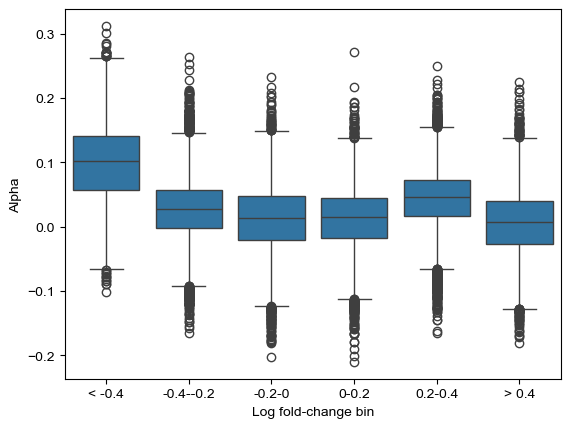

In [18]:
x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinProgenitor.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["All"]))]
x_new = pd.DataFrame()
for i in ['< -0.4', '-0.4--0.2', '-0.2-0', '0-0.2', '0.2-0.4']:
    x2 = x[x["Cutoff"].isin([i])]
#x_new["dc"] = [parse_table(i)[0] for i in x_new["[[dc, du], [pc, pu]]"]]
#x_new["du"] = [parse_table(i)[1] for i in x_new["[[dc, du], [pc, pu]]"]]
#x_new["Alpha all"] = x_new["dc"]/(x_new["du"] + x_new["dc"])*x_new["Alpha"]
#x_new["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x_new.shape[0])

sns.boxplot(data = x, x = "Cutoff", y = "Alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
#plt.ylabel("Alpha using PhyloP")

C:\Users\astar\AppData\Local\Temp\ipykernel_27228\2739459407.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinProgenitor.txt", sep = "\t")


Text(0.5, 0, 'Log fold-change bin')

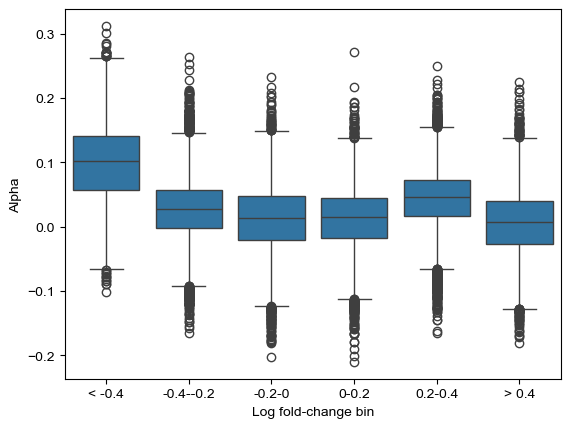

0.0057923381876638
0.0048549449590021
0.0058031725405537
0.0050329064486962
0.0049581478083473


C:\Users\astar\AppData\Local\Temp\ipykernel_12648\916164690.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_12648\916164690.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
C:\Users\astar\AppData\Local\Temp\ipykernel_12648\916164690.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Text(0.5, 0, 'Log fold-change bin')

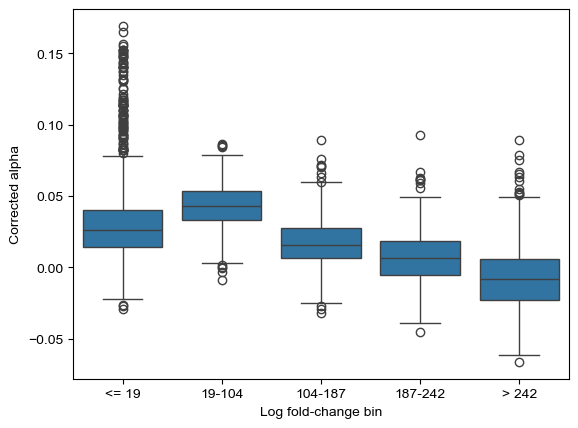

In [9]:
file = "StratifiedBySpecSup_LiangSteinNeuron.txt"
x = pd.read_csv("StratifySpecSup_Results_Permute/" + file, sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
x_new = pd.DataFrame()
for i in ['<= 19', '19-104', '104-187', '187-242', '> 242']:
    x2 = x[x["Cutoff"].isin([i])]
    x2_permute = x2[x2["TypeOfSampling"].isin(["Permuted"])]
    x2_bootstrap = x2[~x2["TypeOfSampling"].isin(["Permuted"])]
    correction_factor = np.median(x2_permute["Alpha"])
    print(correction_factor)
    x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
    x_new = pd.concat([x_new, x2_bootstrap])
x_new["dc"] = [parse_table(i)[0] for i in x_new["[[dc, du], [pc, pu]]"]]
x_new["du"] = [parse_table(i)[1] for i in x_new["[[dc, du], [pc, pu]]"]]
x_new["Alpha all"] = x_new["dc"]/(x_new["du"] + x_new["dc"])*x_new["Corrected alpha"]
#x_new["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x_new.shape[0])

sns.boxplot(data = x_new, x = "Cutoff", y = "Corrected alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
#plt.ylabel("Alpha using PhyloP")

Text(0, 0.5, 'Alpha using chromatin accessibility')

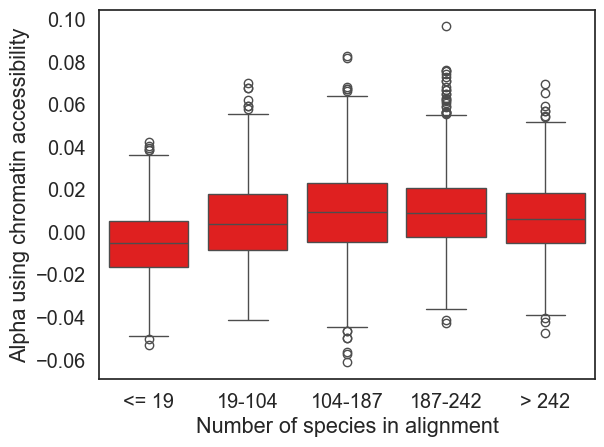

In [37]:
sns.set(font_scale = 1.3)
sns.set_style("white")
x = pd.read_csv("StratifySpecSup_Results/StratifiedBySpecSup_KosoyRoussosControlMicroglia.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
sns.boxplot(data = x, x = "Cutoff", y = "Alpha", color = "red")
#plt.title("Neuron")
plt.xlabel("Number of species in alignment")
plt.ylabel("Alpha using chromatin accessibility")

C:\Users\astar\AppData\Local\Temp\ipykernel_27228\2085935631.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinNeuron.txt", sep = "\t")


Text(0, 0.5, 'Alpha using conservation')

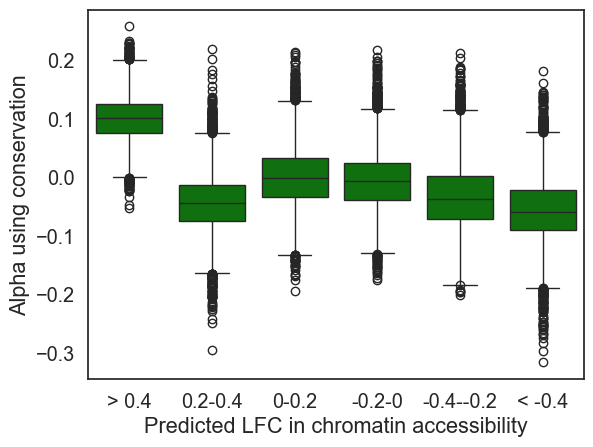

In [67]:
sns.set(font_scale = 1.3)
sns.set_style("white")
x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinNeuron.txt", sep = "\t")
x = x[(x["Metric"].isin(["PhyloP447"])) & (x["Top_20th"].isin(["Top20th"]))]

new = []
d_map = {"< -0.4":"> 0.4", "> 0.4":"< -0.4", "-0.4--0.2":"0.2-0.4", "0.2-0.4":"-0.4--0.2", "-0.2-0":"0-0.2", "0-0.2":"-0.2-0"}
for index, row in x.iterrows():
    new.append(d_map[row["Cutoff"]])
x["Cutoff"] = new


sns.boxplot(data = x, x = "Cutoff", y = "Alpha", color = "green")
#plt.title("Neuron")
plt.xlabel("Predicted LFC in chromatin accessibility")
plt.ylabel("Alpha using conservation")

In [61]:
x

,Cutoff,Metric,Alpha,StartCompute,Crosses,Tag,"[[dc, du], [pc, pu]]",Top_20th,Iteration,NumFixed,NumPoly
0,<= 19,Absolute log fold-change,-0.118155,0.017421,"[0.0479069134268536, 2.791666500601202, 2.8424...","dc > 0.1, likely stable","[[318538, 230996], [181051, 117420]]",All,Real,549534,298471
2,<= 19,Absolute log fold-change,-0.121249,0.016828,"[0.04627723719438881, 2.6672516710220444, 2.72...","dc > 0.1, likely stable","[[324435, 225099], [184379, 114092]]",All,0,549534,298471
4,<= 19,Absolute log fold-change,-0.116363,0.017304,"[0.04758517731462919, 2.1672885304208416, 2.18...","dc > 0.1, likely stable","[[319437, 230097], [181415, 117056]]",All,1,549534,298471
6,<= 19,Absolute log fold-change,-0.129372,0.017421,"[0.04790699828081735, 0.7084416980298944, 0.81...","dc > 0.1, likely stable","[[318127, 231407], [181543, 116928]]",All,2,549534,298471
8,<= 19,Absolute log fold-change,-0.117556,0.017421,"[0.0479069134268536, 1.2673556188376751, 1.308...","dc > 0.1, likely stable","[[318232, 231302], [180850, 117621]]",All,3,549534,298471
...,...,...,...,...,...,...,...,...,...,...,...
10000,> 242,Absolute log fold-change,-0.013522,0.050572,"[0.05057184769539069, 0.06827199438877751, 0.3...","dc > 0.1, likely stable","[[121228, 428306], [66535, 231936]]",All,995,549534,298471
10002,> 242,Absolute log fold-change,-0.016444,0.049338,"[0.04933752304609218, 0.08387378917835675, 0.1...","dc > 0.1, likely stable","[[124237, 425297], [68333, 230138]]",All,996,549534,298471
10004,> 242,Absolute log fold-change,-0.009316,0.017515,"[0.04816493242484965, 0.21163379398797588, 0.2...","dc > 0.1, likely stable","[[307237, 242297], [167553, 130918]]",All,997,549534,298471
10006,> 242,Absolute log fold-change,-0.022175,0.046164,"[0.04616368545090177, 0.07554057619238475, 0.2...","dc > 0.1, likely stable","[[134064, 415470], [74029, 224442]]",All,998,549534,298471


In [62]:
x = pd.read_csv("StratifiedBySpecSup_LiangSteinNeuron.txt", sep = "\t")
x

,Cutoff,Metric,Alpha,StartCompute,Crosses,Tag,Top_20th,Iteration
0,<= 19,Absolute log fold-change,-0.008127,0.017421,"[0.03774484088176344, 2.7815044280561114, 2.83...","dc > 0.1, likely stable",All,Real
1,<= 19,Absolute log fold-change,0.068270,0.075543,"[0.06849212921843695, 0.8088114670941884, 0.83...","dc > 0.1, likely stable",Top20th,Real
2,<= 19,Absolute log fold-change,-0.010609,0.016828,"[0.03646085354709416, 2.6574352873747498, 2.71...","dc > 0.1, likely stable",All,0
3,<= 19,Absolute log fold-change,0.069708,0.075543,"[0.06849229651376465, 0.13194823541761014, 0.1...","dc > 0.1, likely stable",Top20th,0
4,<= 19,Absolute log fold-change,0.002121,0.017304,"[0.03749135182364727, 2.15719470492986, 2.1773...","dc > 0.1, likely stable",All,1
...,...,...,...,...,...,...,...,...
10005,> 242,Absolute log fold-change,-0.012855,0.026579,"[0.046163855158811606, 0.2420097837850368, 0.4...","dc > 0.1, likely stable",Top20th,997
10006,> 242,Absolute log fold-change,-0.004410,0.046164,"[0.03637138853707411, 0.06574827927855709, 0.2...","dc > 0.1, likely stable",All,998
10007,> 242,Absolute log fold-change,0.004355,0.123197,"[0.04480015905042756, 0.11535688820717827, 0.2...","dc > 0.1, likely stable",Top20th,998
10008,> 242,Absolute log fold-change,-0.007812,0.016787,"[0.03637138853707411, 0.2909711082965931, 0.30...","dc > 0.1, likely stable",All,999


Text(0.5, 0, 'Log fold-change bin')

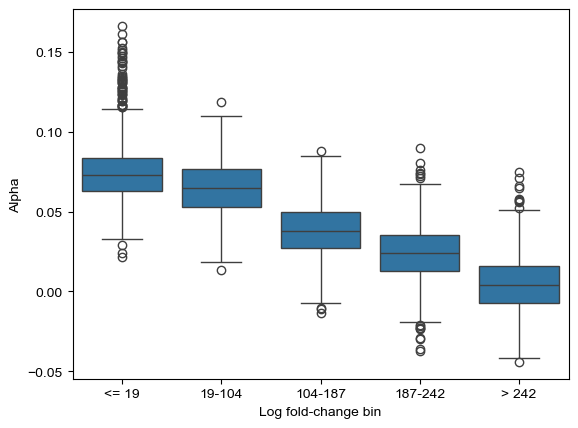

In [64]:
x = pd.read_csv("StratifiedBySpecSup_LiangSteinNeuron.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
sns.boxplot(data = x, x = "Cutoff", y = "Alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
#plt.ylabel("Alpha using PhyloP")

In [52]:
x = pd.read_csv("StratifiedBySpecSup_LiangSteinNeuron.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["All"]))]
x_new = x[x["TypeOfSampling"] != "Permuted"]
sns.boxplot(data = x_new, x = "Cutoff", y = "Alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
#plt.ylabel("Alpha using PhyloP")

KeyError: 'TypeOfSampling'

In [43]:
x

,Cutoff,Metric,Alpha,StartCompute,Crosses,Tag,"[[dc, du], [pc, pu]]",Top_20th,Iteration,NumFixed,NumPoly
0,<= 19,Absolute log fold-change,-0.118155,0.017421,"[0.0479069134268536, 2.791666500601202, 2.8424...","dc > 0.1, likely stable","[[318538, 230996], [181051, 117420]]",All,Real,549534,298471
2,<= 19,Absolute log fold-change,-0.121249,0.016828,"[0.04627723719438881, 2.6672516710220444, 2.72...","dc > 0.1, likely stable","[[324435, 225099], [184379, 114092]]",All,0,549534,298471
4,<= 19,Absolute log fold-change,-0.116363,0.017304,"[0.04758517731462919, 2.1672885304208416, 2.18...","dc > 0.1, likely stable","[[319437, 230097], [181415, 117056]]",All,1,549534,298471
6,<= 19,Absolute log fold-change,-0.129372,0.017421,"[0.04790699828081735, 0.7084416980298944, 0.81...","dc > 0.1, likely stable","[[318127, 231407], [181543, 116928]]",All,2,549534,298471
8,<= 19,Absolute log fold-change,-0.117556,0.017421,"[0.0479069134268536, 1.2673556188376751, 1.308...","dc > 0.1, likely stable","[[318232, 231302], [180850, 117621]]",All,3,549534,298471
...,...,...,...,...,...,...,...,...,...,...,...
10000,> 242,Absolute log fold-change,-0.013522,0.050572,"[0.05057184769539069, 0.06827199438877751, 0.3...","dc > 0.1, likely stable","[[121228, 428306], [66535, 231936]]",All,995,549534,298471
10002,> 242,Absolute log fold-change,-0.016444,0.049338,"[0.04933752304609218, 0.08387378917835675, 0.1...","dc > 0.1, likely stable","[[124237, 425297], [68333, 230138]]",All,996,549534,298471
10004,> 242,Absolute log fold-change,-0.009316,0.017515,"[0.04816493242484965, 0.21163379398797588, 0.2...","dc > 0.1, likely stable","[[307237, 242297], [167553, 130918]]",All,997,549534,298471
10006,> 242,Absolute log fold-change,-0.022175,0.046164,"[0.04616368545090177, 0.07554057619238475, 0.2...","dc > 0.1, likely stable","[[134064, 415470], [74029, 224442]]",All,998,549534,298471


Text(0.5, 0, 'Log fold-change bin')

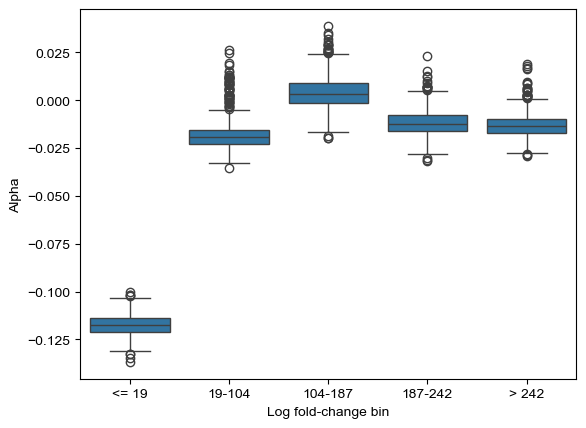

In [42]:
x = pd.read_csv("StratifySpecSup_Results/StratifiedBySpecSup_LiangSteinNeuron.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["All"]))]
sns.boxplot(data = x, x = "Cutoff", y = "Alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
#plt.ylabel("Alpha using PhyloP")

In [13]:
import os
df = pd.DataFrame()
for file in os.listdir("HARs_Results_Permute"):
    if "abs" in file and "Old" not in file:
        x = pd.read_csv("HARs_Results_Permute/" + file, sep = "\t")
        x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
        #x = x[(x["Distance_bin"].isin(["InHAQERs"]))]
        x = x[x["LFC_bin"] == "NoLFCCutoff"]
        x_new = pd.DataFrame()
        for i in np.unique(x["Distance_bin"]):
            x2 = x[x["Distance_bin"].isin([i])]
            x2_permute = x2[x2["TypeOfSampling"].isin(["Permuted"])]
            x2_bootstrap = x2[~x2["TypeOfSampling"].isin(["Permuted"])]
            correction_factor = np.median(x2_permute["Alpha"])
            print(correction_factor)
            x2_bootstrap["Corrected alpha"] = x2_bootstrap["Alpha"] - correction_factor
            x_new = pd.concat([x_new, x2_bootstrap])
        x_new["dc"] = [parse_table(i)[0] for i in x_new["[[dc, du], [pc, pu]]"]]
        x_new["du"] = [parse_table(i)[1] for i in x_new["[[dc, du], [pc, pu]]"]]
        x_new["Alpha all"] = x_new["dc"]/(x_new["du"] + x_new["dc"])*x_new["Corrected alpha"]
        x_new["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x_new.shape[0])
        df = pd.concat([df, x_new])
sns.boxplot(data = df, x = "CellType", y = "Corrected alpha", hue = "Distance_bin")
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
#plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

C:\Users\astar\AppData\Local\Temp\ipykernel_8820\3083616619.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HARs_Results_Permute/" + file, sep = "\t")


KeyError: 'TypeOfSampling'

In [28]:
v = pd.read_csv("Finalizing_PerGene_FisherExact_NonCod_PhyloP447_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1 (3).csv")
v["dc"] = [parse_table(i)[0] for i in v["[[dc, pc], [du, pu]]"]]
v["du"] = [parse_table(i)[1] for i in v["[[dc, pc], [du, pu]]"]]
v["pc"] = [parse_table(i)[2] for i in v["[[dc, pc], [du, pu]]"]]
v["pu"] = [parse_table(i)[3] for i in v["[[dc, pc], [du, pu]]"]]

In [30]:
v.head(50)

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Cutoff,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
0,NEO1,0.1310,626,0.1200,155,0.000021,0.890937,1.929025,"[0.3910336673346695, 1.929024849699399, 13.738...","dc > 0.1, likely stable","[[67, 559], [2, 153]]",0.165556
1,SNAP91,0.1260,369,-0.2280,48,0.000046,0.719064,-0.093425,"[-0.09342484969939768, 2.4157679358717434, 2.8...","dc > 0.1, likely stable","[[244, 125], [17, 31]]",0.181341
2,SPANXF1,0.1110,173,-0.1630,35,0.000229,0.851679,0.251768,"[0.25176793587174195, 7.4902]","dc > 0.1, likely stable","[[67, 106], [3, 32]]",0.479222
3,TNIP3,-0.0620,469,-0.1435,110,0.000273,0.919534,1.104075,"[1.104075350701402, 6.945399999999999]","dc > 0.1, likely stable","[[48, 421], [1, 109]]",0.479222
4,C1orf173,0.1080,369,-0.1700,67,0.000306,0.670501,0.297990,"[0.29798957915831714, 3.357379559118236, 4.942...","dc > 0.1, likely stable","[[147, 222], [12, 55]]",0.479222
5,GPC4,0.2720,620,0.1360,59,0.000375,0.859649,1.335830,"[1.3358296593186392, 11.496]","dc > 0.1, likely stable","[[124, 496], [2, 57]]",0.488859
6,MORC1,0.0380,492,-0.0235,86,0.000651,0.808156,0.927865,"[0.927864529058116, 6.260400000000001]","dc > 0.1, likely stable","[[78, 414], [3, 83]]",0.610154
7,INSL5,0.0500,235,-0.1235,32,0.000763,0.827194,0.309831,"[0.3098308617234462, 1.893817234468937, 2.0231...","dc > 0.1, likely stable","[[88, 147], [3, 29]]",0.610154
8,CXCR4,0.1385,930,0.0690,263,0.000815,0.452237,0.888568,"[0.8885675350701376, 5.782619639278554, 6.5439...","dc > 0.1, likely stable","[[214, 716], [37, 226]]",0.610154
9,RHOQ,0.1220,200,0.2250,45,0.000913,1.000000,1.317957,"[1.3179567134268524, 6.7546]","dc > 0.1, likely stable","[[32, 168], [0, 45]]",0.610154


In [13]:
v2 = v[v["alpha"] > 0.25]
v2["Div"] = v2["pc"]/(v2["pu"] + 1)
alpha = 1 - np.mean(v2["du"])/np.mean(v2["dc"])*np.mean(v2["Div"])
alpha

C:\Users\astar\AppData\Local\Temp\ipykernel_7320\1017551060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2["Div"] = v2["pc"]/(v2["pu"] + 1)


-0.6213343782359491

In [14]:
x = pd.read_csv("HAQERs_abslogfc_KosoyRoussosControlMicroglia.txt", sep = "\t")
x

,Distance_bin,Metric,Alpha,StartCompute,Crosses,Tag,Top_20th,LFC_bin,NumFixed,NumPoly,Iteration
0,InHAQERs,Absolute log fold-change,0.248443,0.025528,"[0.022900347966297918, 0.27778069884176365, 0....","dc > 0.1, likely stable",All,NoLFCCutoff,8655,2677,Real
1,InHAQERs,Absolute log fold-change,0.223214,0.024932,"[0.022605447468790396, 0.16917161622291627, 0....","dc > 0.1, likely stable",All,LessThan0,4669,1450,Real
2,InHAQERs,Absolute log fold-change,0.289935,0.028156,"[0.025527980449550153, 0.08070826259784686, 0....","dc > 0.1, likely stable",All,GreaterThan0,3986,1227,Real
3,InHAQERs,Absolute log fold-change,0.361722,0.025528,"[0.022900347966297918, 0.2804083313250159, 0.3...","dc > 0.1, likely stable",Top20th,NoLFCCutoff,8655,2677,Real
4,InHAQERs,Absolute log fold-change,0.370960,0.022367,"[0.021029517541947887, 0.27656476229096916, 0....","dc > 0.1, likely stable",Top20th,LessThan0,1602,498,Real
...,...,...,...,...,...,...,...,...,...,...,...
180013,5kbWindow_Plus_Region,Absolute log fold-change,0.097670,0.022919,"[0.01950600202338479, 0.13896551689274153, 0.1...","dc > 0.1, likely stable",All,LessThan0,20642,6501,Real
180014,5kbWindow_Plus_Region,Absolute log fold-change,0.207828,0.023226,"[0.02021565347774784, 0.07742067826837676, 0.0...","dc > 0.1, likely stable",All,GreaterThan0,18237,5459,Real
180015,5kbWindow_Plus_Region,Absolute log fold-change,0.223550,0.025528,"[0.02290076741561564, 0.33821652064933905, 0.3...","dc > 0.1, likely stable",Top20th,NoLFCCutoff,11834,4090,Real
180016,5kbWindow_Plus_Region,Absolute log fold-change,0.247183,0.046964,"[0.018383932986611617, 0.044582732437668915, 0...","dc > 0.1, likely stable",Top20th,LessThan0,6163,2064,Real


In [13]:
x = pd.read_csv("HAQERs_abslogfc_KosoyRoussosControlMicroglia.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["All"]))]
x = x[x["Iteration"].isin(["Real"])]
x

,Distance_bin,Metric,Alpha,StartCompute,Crosses,Tag,Top_20th,LFC_bin,NumFixed,NumPoly,Iteration
0,InHAQERs,Absolute log fold-change,0.248443,0.025528,"[0.022900347966297918, 0.27778069884176365, 0....","dc > 0.1, likely stable",All,NoLFCCutoff,8655,2677,Real
1,InHAQERs,Absolute log fold-change,0.223214,0.024932,"[0.022605447468790396, 0.16917161622291627, 0....","dc > 0.1, likely stable",All,LessThan0,4669,1450,Real
2,InHAQERs,Absolute log fold-change,0.289935,0.028156,"[0.025527980449550153, 0.08070826259784686, 0....","dc > 0.1, likely stable",All,GreaterThan0,3986,1227,Real
6,InHAQERs,Absolute log fold-change,0.238603,0.025528,"[0.022900347966297918, 0.1385161772293958, 0.1...","dc > 0.1, likely stable",All,NoLFCCutoff,8655,2677,Real
7,InHAQERs,Absolute log fold-change,0.274521,0.024932,"[0.022605447468790396, 0.15986582773059083, 0....","dc > 0.1, likely stable",All,LessThan0,4740,1436,Real
...,...,...,...,...,...,...,...,...,...,...,...
180007,5kbWindow_Plus_Region,Absolute log fold-change,0.059089,0.022920,"[0.019507186603687332, 0.11848782954440079, 0....","dc > 0.1, likely stable",All,LessThan0,20488,6442,Real
180008,5kbWindow_Plus_Region,Absolute log fold-change,0.256157,0.026239,"[0.023228463378837327, 0.4597922866768628, 0.5...","dc > 0.1, likely stable",All,GreaterThan0,18391,5518,Real
180012,5kbWindow_Plus_Region,Absolute log fold-change,0.144363,0.022917,"[0.019503971316528146, 0.27548908030179203, 0....","dc > 0.1, likely stable",All,NoLFCCutoff,38879,11960,Real
180013,5kbWindow_Plus_Region,Absolute log fold-change,0.097670,0.022919,"[0.01950600202338479, 0.13896551689274153, 0.1...","dc > 0.1, likely stable",All,LessThan0,20642,6501,Real


In [62]:
df2 = df[~df["CellType"].isin(["PhyloP447"])]
out = []
for chrom in np.unique(df2["Chrom"]):
    df3 = df2[df2["Chrom"].isin([chrom])]
    out.append([chrom, np.median(df3["Alpha"])])
df4 = pd.DataFrame(out)
df4.columns = ["Chrom", "Alpha"]
df5 = df[df["CellType"].isin(["PhyloP447"])]
print(pearsonr(df4["Alpha"], df5["Alpha"]))

PearsonRResult(statistic=0.23800227817413044, pvalue=0.2741412903868355)


In [56]:
from scipy.stats import spearmanr,pearsonr
df = df.sort_values("Chrom")
for i in np.unique(df["CellType"]):
    print(i, pearsonr(df[df["CellType"].isin([i])]["Alpha"], df[df["CellType"].isin(["PhyloP447"])]["Alpha"]))

FetalChondrocytes PearsonRResult(statistic=0.2618111602973656, pvalue=0.22752042810696746)
Microglia PearsonRResult(statistic=0.025135818432599627, pvalue=0.9093628709680647)
Neuron PearsonRResult(statistic=-0.33196428708346326, pvalue=0.12173656984176225)
PhyloP447 PearsonRResult(statistic=1.0, pvalue=0.0)
Progenitor PearsonRResult(statistic=0.09944328615298534, pvalue=0.6516729349674472)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'chrX'),
  Text(1, 0, 'chr22'),
  Text(2, 0, 'chr21'),
  Text(3, 0, 'chr17'),
  Text(4, 0, 'chr19'),
  Text(5, 0, 'chr18'),
  Text(6, 0, 'chr12'),
  Text(7, 0, 'chr6'),
  Text(8, 0, 'chr16'),
  Text(9, 0, 'chr5'),
  Text(10, 0, 'chr1'),
  Text(11, 0, 'chr14'),
  Text(12, 0, 'chr4'),
  Text(13, 0, 'chr7'),
  Text(14, 0, 'chr13'),
  Text(15, 0, 'chr10'),
  Text(16, 0, 'chr2'),
  Text(17, 0, 'chr8'),
  Text(18, 0, 'chr3'),
  Text(19, 0, 'chr9'),
  Text(20, 0, 'chr11'),
  Text(21, 0, 'chr15'),
  Text(22, 0, 'chr20')])

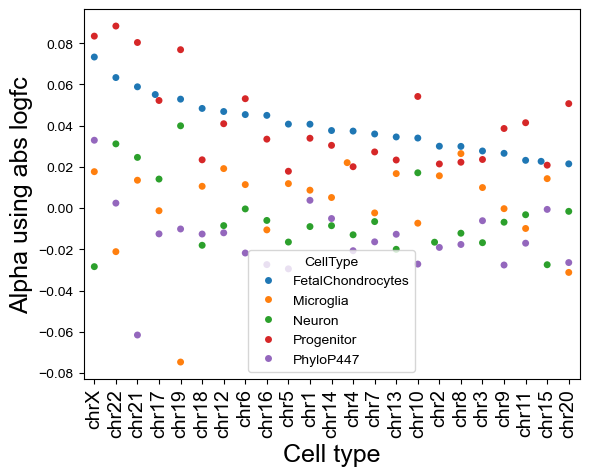

In [46]:
import os
df = pd.DataFrame()
for file in os.listdir("PerChrom_Results"):
    x = pd.read_csv("PerChrom_Results/" + file, sep = "\t")
    x["CellType"] = np.repeat(file.split("_")[1].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x.shape[0])
    df = pd.concat([df, x])
sns.swarmplot(data = df, x = "Chrom", y = "Alpha", hue = "CellType")
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

In [2]:
def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

In [16]:
file

'HARs_PhyloP447_LiangSteinProgenitor.txt'

In [15]:
x = pd.read_csv("HARs_Results/" + file, sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
x

C:\Users\astar\AppData\Local\Temp\ipykernel_11488\382939237.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HARs_Results/" + file, sep = "\t")


,Distance_bin,Metric,Alpha,StartCompute,Crosses,Tag,"[[dc, du], [pc, pu]]",Top_20th,LFC_bin,NumFixed,NumPoly,Iteration


In [22]:
file

'HARs_abslogfc_KosoyRoussosControlMicroglia.txt'

In [25]:
x = pd.read_csv("HARs_Results/" + file, sep = "\t")
np.unique(x["Metric"])

C:\Users\astar\AppData\Local\Temp\ipykernel_8540\2092230644.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HARs_Results/" + file, sep = "\t")


array(['Absolute log fold-change'], dtype=object)

C:\Users\astar\AppData\Local\Temp\ipykernel_8540\3384548852.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HARs_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_8540\3384548852.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HARs_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_8540\3384548852.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HARs_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_8540\3384548852.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HARs_Results/" + file, sep = "\t")


([0, 1, 2, 3],
 [Text(0, 0, 'FetalChondrocytes'),
  Text(1, 0, 'Microglia'),
  Text(2, 0, 'Neuron'),
  Text(3, 0, 'Progenitor')])

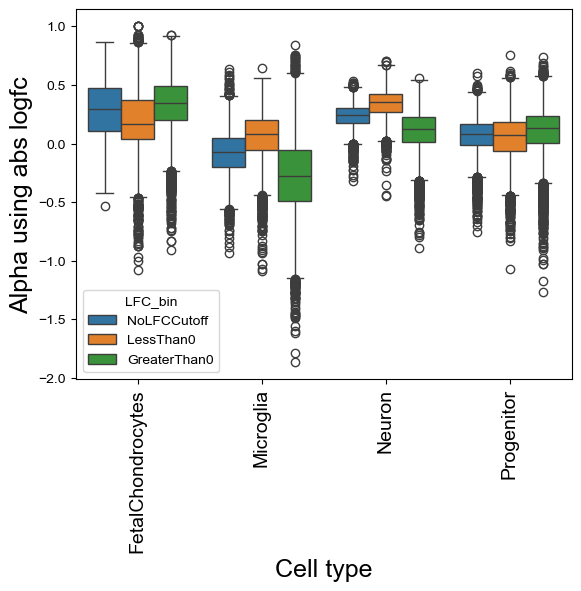

In [29]:
import os
df = pd.DataFrame()
for file in os.listdir("HARs_Results"):
    if "abslogfc" in file:
        x = pd.read_csv("HARs_Results/" + file, sep = "\t")
        
        x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
        x = x[(x["Distance_bin"].isin(["InHARs"]))]
        
        #x = x[x["LFC_bin"] == "NoLFCCutoff"]
        x["dc"] = [parse_table(i)[0] for i in x["[[dc, du], [pc, pu]]"]]
        x["du"] = [parse_table(i)[1] for i in x["[[dc, du], [pc, pu]]"]]
        x["Alpha all"] = x["dc"]/(x["du"] + x["dc"])*x["Alpha"]
        x["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x.shape[0])
        df = pd.concat([df, x])
sns.boxplot(data = df, x = "CellType", y = "Alpha", hue = "LFC_bin")
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

In [ ]:
import os
df = pd.DataFrame()
for file in os.listdir("HARs_Results"):
    if "JSD" in file or "jsd" in file:
        x = pd.read_csv("HARs_Results/" + file, sep = "\t")
        x = x[(x["Metric"].isin(["JSD"])) & (x["Top_20th"].isin(["Top20th"]))]
        #x = x[(x["Distance_bin"].isin(["InHAQERs"]))]
        #x = x[x["LFC_bin"] == "NoLFCCutoff"]
        x["dc"] = [parse_table(i)[0] for i in x["[[dc, du], [pc, pu]]"]]
        x["du"] = [parse_table(i)[1] for i in x["[[dc, du], [pc, pu]]"]]
        x["Alpha all"] = x["dc"]/(x["du"] + x["dc"])*x["Alpha"]
        x["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x.shape[0])
        sns.boxplot(data = x, x = "Distance_bin", y = "Alpha all", hue = "LFC_bin")
        plt.title(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""))
        plt.show()
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
#plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

C:\Users\astar\AppData\Local\Temp\ipykernel_19388\2601024180.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_19388\2601024180.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_19388\2601024180.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_19388\2601024180.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")


([0, 1, 2, 3],
 [Text(0, 0, 'FetalChondrocytes'),
  Text(1, 0, 'Microglia'),
  Text(2, 0, 'Neuron'),
  Text(3, 0, 'Progenitor')])

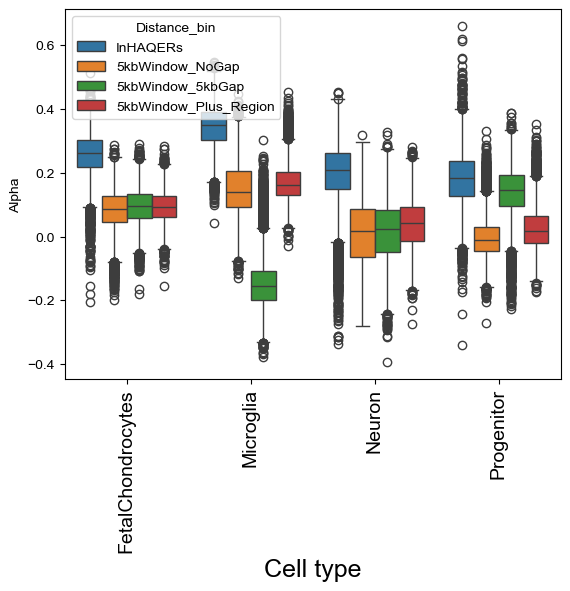

In [4]:
import os
df = pd.DataFrame()
for file in os.listdir("HAQERs_Results"):
    if "JSD" in file or "jsd" in file:
        x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")
        x = x[(x["Metric"].isin(["JSD"])) & (x["Top_20th"].isin(["Top20th"]))]
        #x = x[(x["Distance_bin"].isin(["InHAQERs"]))]
        x = x[x["LFC_bin"] == "NoLFCCutoff"]
        x["dc"] = [parse_table(i)[0] for i in x["[[dc, du], [pc, pu]]"]]
        x["du"] = [parse_table(i)[1] for i in x["[[dc, du], [pc, pu]]"]]
        x["Alpha all"] = x["dc"]/(x["du"] + x["dc"])*x["Alpha"]
        x["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x.shape[0])
        df = pd.concat([df, x])
sns.boxplot(data = df, x = "CellType", y = "Alpha", hue = "Distance_bin")
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
#plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

C:\Users\astar\AppData\Local\Temp\ipykernel_19388\2403089489.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")


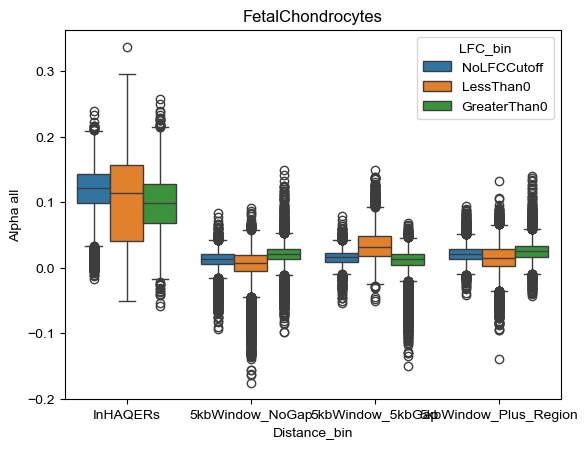

C:\Users\astar\AppData\Local\Temp\ipykernel_19388\2403089489.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")


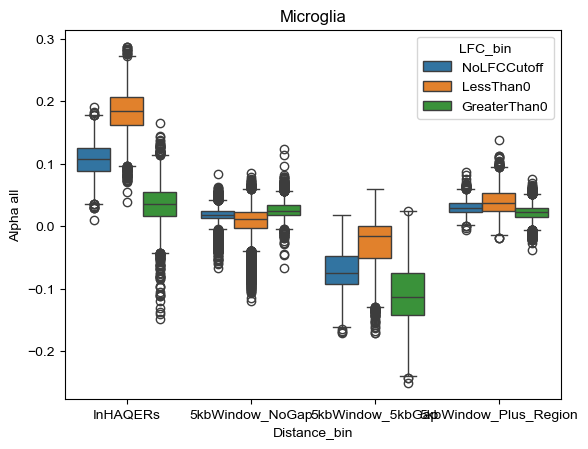

C:\Users\astar\AppData\Local\Temp\ipykernel_19388\2403089489.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")


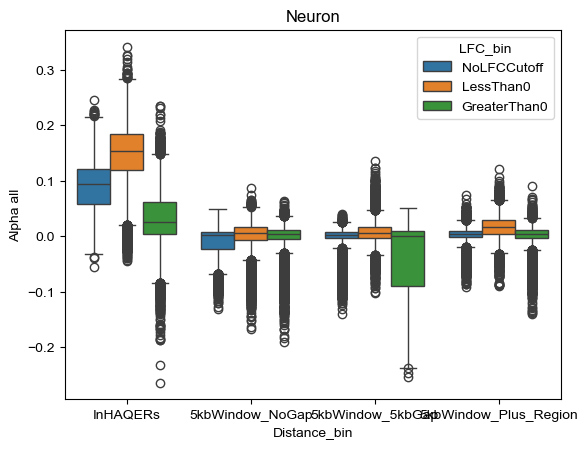

C:\Users\astar\AppData\Local\Temp\ipykernel_19388\2403089489.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")


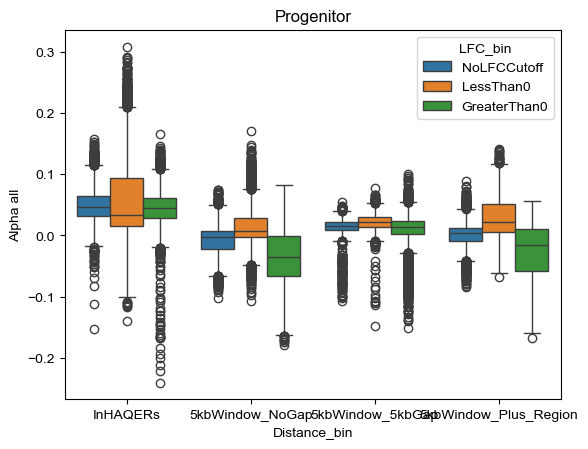

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

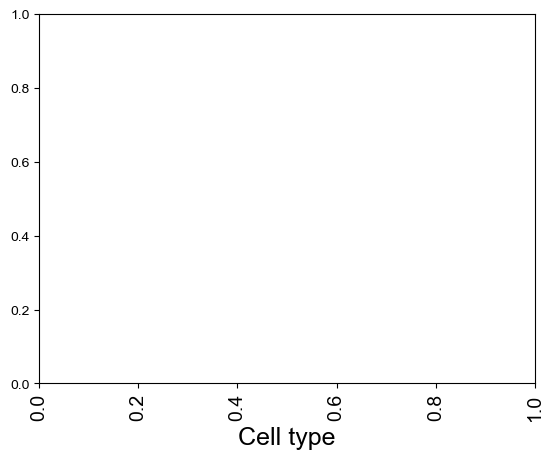

In [9]:
import os
df = pd.DataFrame()
for file in os.listdir("HAQERs_Results"):
    if "JSD" in file or "jsd" in file:
        x = pd.read_csv("HAQERs_Results/" + file, sep = "\t")
        x = x[(x["Metric"].isin(["JSD"])) & (x["Top_20th"].isin(["Top20th"]))]
        #x = x[(x["Distance_bin"].isin(["InHAQERs"]))]
        #x = x[x["LFC_bin"] == "NoLFCCutoff"]
        x["dc"] = [parse_table(i)[0] for i in x["[[dc, du], [pc, pu]]"]]
        x["du"] = [parse_table(i)[1] for i in x["[[dc, du], [pc, pu]]"]]
        x["Alpha all"] = x["dc"]/(x["du"] + x["dc"])*x["Alpha"]
        x["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x.shape[0])
        sns.boxplot(data = x, x = "Distance_bin", y = "Alpha all", hue = "LFC_bin")
        plt.title(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""))
        plt.show()
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
#plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

In [19]:
for lfc_cut in np.unique(x["LFC_bin"]):
    x2 = x[x["LFC_bin"] == lfc_cut].sort_values("Alpha")
    alphas = list(x2["Alpha"])
    zscore = (np.mean(alphas) - 0.248443)/np.std(alphas)
    print(lfc_cut, alphas[250], alphas[-250], zscore, norm.sf(abs(zscore)))

GreaterThan0 0.1002480583263738 0.5290312931657726 0.8182954740978631 0.20659424490494382
LessThan0 0.2230981176747701 0.5118628351179176 1.7036093705841495 0.04422704483722409
NoLFCCutoff 0.2221879460340348 0.4820600040734006 1.7128445750477024 0.04337056856000221


Text(0, 0.5, 'Alpha using PhyloP')

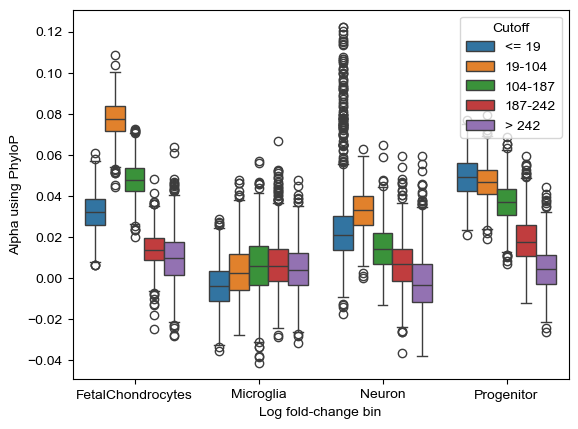

In [45]:
df = pd.DataFrame()
for file in os.listdir("StratifySpecSup_Results"):
    x = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")
    x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
    x["dc"] = [parse_table(i)[0] for i in x["[[dc, du], [pc, pu]]"]]
    x["du"] = [parse_table(i)[2] for i in x["[[dc, du], [pc, pu]]"]]
    x["Alpha all"] = x["dc"]/(x["du"] + x["dc"])*x["Alpha"]
    x["CellType"] = np.repeat(file.split("_")[1].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", ""), x.shape[0])
    df = pd.concat([df, x])
sns.boxplot(data = df, x = "CellType", y = "Alpha all", hue = "Cutoff")
#plt.title("Neuron")

plt.xlabel("Log fold-change bin")
plt.ylabel("Alpha using PhyloP")

In [ ]:
x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinNeuron.txt", sep = "\t")
x = x[(x["Metric"].isin(["PhyloP447"])) & (x["Top_20th"].isin(["Top20th"]))]
x["dc"] = [parse_table(i)[0] for i in x["[[dc, pc], [du, pu]]"]]
x["du"] = [parse_table(i)[2] for i in x["[[dc, pc], [du, pu]]"]]
x["Alpha all"] = x["dc"]/(x["du"] + x["dc"])*x["Alpha"]
sns.boxplot(data = x, x = "Cutoff", y = "Alpha")
#plt.title("Neuron")

plt.xlabel("Log fold-change bin")
plt.ylabel("Alpha using PhyloP")

C:\Users\astar\AppData\Local\Temp\ipykernel_31812\710587757.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinNeuron.txt", sep = "\t")


Text(0, 0.5, 'Alpha using PhyloP')

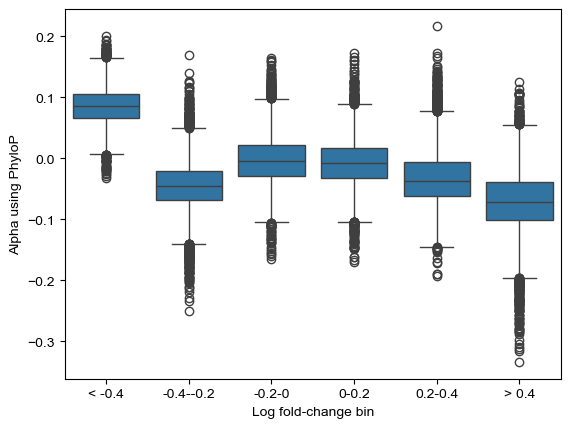

In [61]:
x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_LiangSteinNeuron.txt", sep = "\t")
x = x[(x["Metric"].isin(["PhyloP447"])) & (x["Top_20th"].isin(["Top20th"]))]
sns.boxplot(data = x, x = "Cutoff", y = "Alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
plt.ylabel("Alpha using PhyloP")

Text(0.5, 0, 'Log fold-change bin')

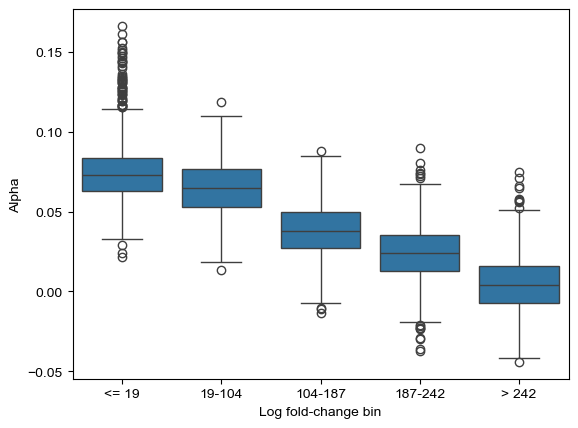

In [21]:
x = pd.read_csv("StratifiedBySpecSup_LiangSteinNeuron.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
sns.boxplot(data = x, x = "Cutoff", y = "Alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
#plt.ylabel("Alpha using PhyloP")

Text(0.5, 0, 'Log fold-change bin')

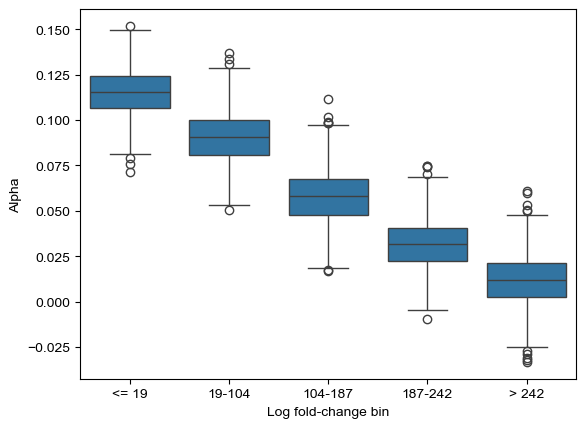

In [23]:
x = pd.read_csv("StratifySpecSup_Results/StratifiedBySpecSup_LiangSteinProgenitor.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["Top20th"]))]
sns.boxplot(data = x, x = "Cutoff", y = "Alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
#plt.ylabel("Alpha using PhyloP")

In [18]:
to_compare = float(x[(x["Cutoff"] == "> 242") & (x["Top_20th"] == "Top20th") & (x["Iteration"] == "Real")]["Alpha"])
for i in ["<= 19", "19-104", "104-187", "187-242", "> 242"]:
    x2 = x[(x["Cutoff"] == i) & (x["Top_20th"] == "Top20th")]
    x2 = x2[x2["Iteration"] != "Real"]
    x2 = x2.sort_values("Alpha")
    alphas = list(x2["Alpha"])
    zscore = (np.mean(alphas) - to_compare)/np.std(alphas)
    print(alphas[25], alphas[-25], i, to_compare, zscore, norm.sf(abs(zscore)))

0.0900124992203269 0.1392642766319964 <= 19 0.0067399698697599 8.669329404111727 2.17336381548858e-18
0.0632525014219408 0.1174699540310134 19-104 0.0067399698697599 5.898356382769131 1.8357016268279803e-09
0.03029656734281 0.0864637330137845 104-187 0.0067399698697599 3.5281908561887 0.00020920517969051072
0.0061299945344791 0.0585065472727097 187-242 0.0067399698697599 1.8464821110209995 0.03241111724369339
-0.0166692718694796 0.0399397205710899 > 242 0.0067399698697599 0.35544624222658905 0.3611276556404447


C:\Users\astar\AppData\Local\Temp\ipykernel_2060\1875877619.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  to_compare = float(x[(x["Cutoff"] == "> 242") & (x["Top_20th"] == "Top20th") & (x["Iteration"] == "Real")]["Alpha"])


In [38]:
to_compare = float(x[(x["Cutoff"] == "> 0.4") & (x["Top_20th"] == "All") & (x["Iteration"] == "Real")]["Alpha"])
for i in ["< -0.4", "-0.4--0.2", "-0.2-0", "0-0.2", "> 0.4"]:
    x2 = x[(x["Cutoff"] == i) & (x["Top_20th"] == "All")]
    x2 = x2[x2["Iteration"] != "Real"]
    x2 = x2.sort_values("Alpha")
    alphas = list(x2["Alpha"])
    zscore = (np.mean(alphas) - to_compare)/np.std(alphas)
    print(alphas[250], alphas[-250], i, to_compare, zscore, norm.sf(abs(zscore)))

0.0170969954700427 0.1293891697913103 < -0.4 -0.0221816269884191 3.3379726861655814 0.0004219602236901053
-0.0035021606414009 0.1113748760203505 -0.4--0.2 -0.0221816269884191 2.6684315410038613 0.0038103153485611564
-0.0786372650671645 0.080959739355132 -0.2-0 -0.0221816269884191 0.5035613370743313 0.307284833731598
-0.0785716379806615 0.0718133859113744 0-0.2 -0.0221816269884191 0.539195490351255 0.2948759858619169
-0.078078988819751 0.0966436016602837 > 0.4 -0.0221816269884191 0.5444437309982078 0.2930680797771319


C:\Users\astar\AppData\Local\Temp\ipykernel_19004\821935530.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  to_compare = float(x[(x["Cutoff"] == "> 0.4") & (x["Top_20th"] == "All") & (x["Iteration"] == "Real")]["Alpha"])


In [32]:
x

,Cutoff,Metric,Alpha,StartCompute,Crosses,Tag,Top_20th,Iteration
5,< -0.4,Absolute log fold-change,0.010401,0.963104,"[0.8624316111022041, 0.9553599492184366, 1.195...","dc < 0.1, may be unstable",Top20th,Real
11,< -0.4,Absolute log fold-change,-0.004349,0.934794,"[0.8590391212024049, 0.9284808104609219, 1.155...","dc < 0.1, may be unstable",Top20th,0
17,< -0.4,Absolute log fold-change,-0.018886,1.027715,"[0.8296146943887777, 1.0206399714228458, 1.247...","dc < 0.1, may be unstable",Top20th,1
23,< -0.4,Absolute log fold-change,0.112650,0.560469,"[0.552725276032064, 0.9476624140280561, 1.4665...","dc > 0.1, likely stable",Top20th,2
29,< -0.4,Absolute log fold-change,-0.029795,0.730834,"[0.6688832577955912, 0.7230903159519038, 0.823...","dc > 0.1, likely stable",Top20th,3
...,...,...,...,...,...,...,...,...
360011,> 0.4,Absolute log fold-change,0.055148,1.076762,"[0.8230873099478959, 1.0708624688416835, 1.241...","dc < 0.1, may be unstable",Top20th,9995
360017,> 0.4,Absolute log fold-change,0.023158,1.039186,"[0.5634913869659319, 1.0322919356152305, 1.225...","dc < 0.1, may be unstable",Top20th,9996
360023,> 0.4,Absolute log fold-change,-0.089884,0.728686,"[0.5870988333306613, 0.7227860893947895, 0.799...","dc > 0.1, likely stable",Top20th,9997
360029,> 0.4,Absolute log fold-change,-0.042095,1.129865,"[0.6756127494989979, 1.1239651847695389, 1.236...","dc < 0.1, may be unstable",Top20th,9998


C:\Users\astar\AppData\Local\Temp\ipykernel_18048\4119071772.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_FetalChondrocytes.txt", sep = "\t")


Text(0, 0.5, 'Alpha using PhyloP')

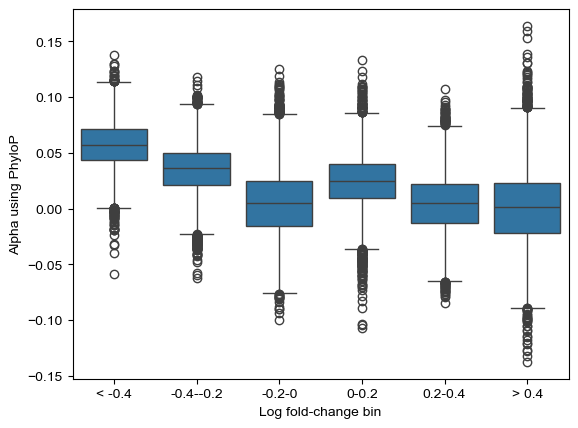

In [36]:
x = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_FetalChondrocytes.txt", sep = "\t")
x = x[(x["Metric"].isin(["Absolute log fold-change"])) & (x["Top_20th"].isin(["All"]))]
sns.boxplot(data = x, x = "Cutoff", y = "Alpha")
#plt.title("Neuron")
plt.xlabel("Log fold-change bin")
plt.ylabel("Alpha using PhyloP")

In [35]:
for i in ["< -0.4", "-0.4--0.2", "-0.2-0", "0-0.2", "> 0.4"]:
    x2 = x[(x["Cutoff"] == i) & (x["Top_20th"] == "Top20th")]
    x2 = x2[x2["Iteration"] != "Real"]
    x2 = x2.sort_values("Alpha")
    alphas = list(x2["Alpha"])
    print(alphas[250], alphas[-250], i, len(alphas))

-0.0844759191664801 0.1105497575149053 < -0.4 10000
0.0248833899967936 0.1635470569939552 -0.4--0.2 10000
-0.0724660659359248 0.1055309099912915 -0.2-0 10000
-0.0773547753904677 0.1103137063454471 0-0.2 10000
-0.1298386004538967 0.0872595969006914 > 0.4 10000


<Axes: xlabel='Number cell types cutoff', ylabel='Alpha'>

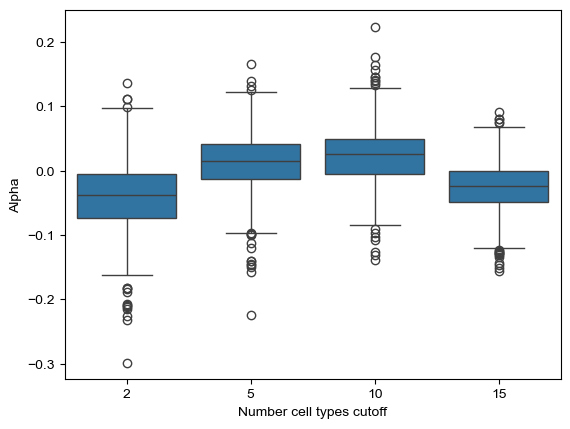

In [41]:
x = pd.read_csv("Brain_CATLas_CellTypeSpec_PhyloP_ConfInterval_1000.txt", sep = "\t")
x = x[x["Cell type"].isin(['L6B'])]
sns.boxplot(data = x, x = "Number cell types cutoff", y = "Alpha")

In [28]:
np.mean(x[x["Number cell types cutoff"].isin([2])]["Alpha"])

0.05021244910881511

In [29]:
(0.05 - np.mean(x[x["Number cell types cutoff"].isin([15])]["Alpha"]))/np.std(x[x["Number cell types cutoff"].isin([15])]["Alpha"])

4.94924154035499

In [30]:
from scipy.stats import norm
norm.sf(4.95)

3.710674079633328e-07